<a href="https://colab.research.google.com/github/flaghunter21/TensorFlow-Practice/blob/main/fcc_tf_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [45]:
df = pd.read_csv('wine-reviews.csv', usecols = ['country','description','points','price','variety','winery'])

In [3]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [46]:
df = df.dropna(subset=['description', 'points'])

In [6]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


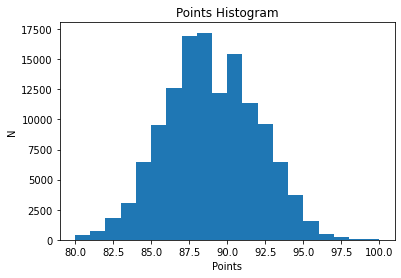

In [8]:
plt.hist(df.points, bins=20)
plt.title('Points Histogram')
plt.ylabel('N')
plt.xlabel('Points')
plt.show()

In [11]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.rename(columns={'F':'Pregnancies'}, inplace=True)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


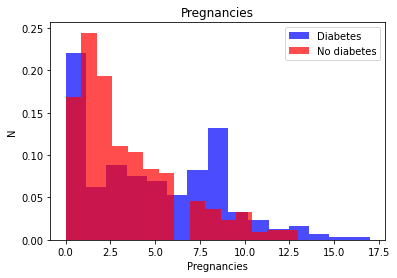

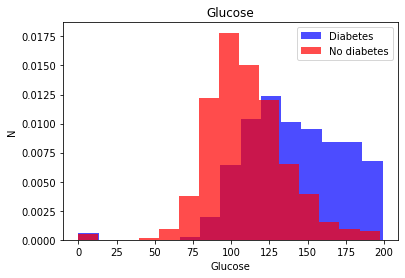

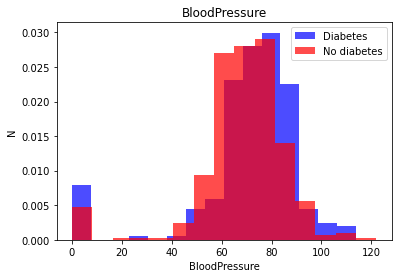

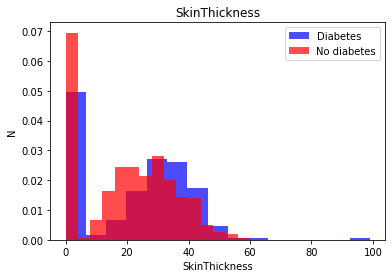

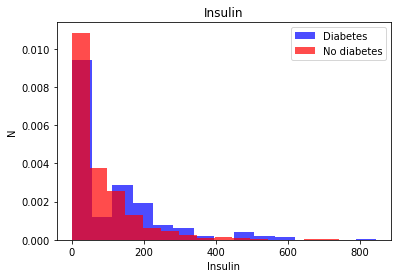

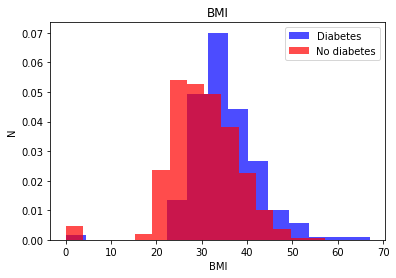

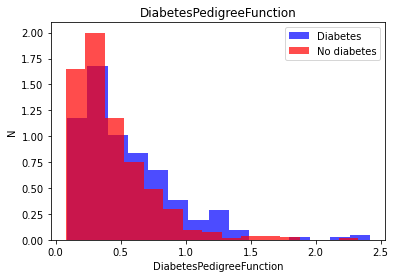

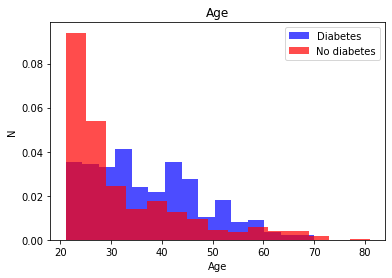

In [16]:
for i in range(len(diabetes.columns[:-1])):
  label = diabetes.columns[i]
  plt.hist(diabetes[diabetes['Outcome'] == 1][label], color='blue', label='Diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(diabetes[diabetes['Outcome'] == 0][label], color='red',label='No diabetes',alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel('N')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [20]:
X = diabetes[diabetes.columns[:-1]].values
y = diabetes[diabetes.columns[-1]].values

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [37]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [39]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.4900


[0.7183801531791687, 0.49000000953674316]

In [40]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.7327 - accuracy: 0.5000


[0.7327033877372742, 0.5]

In [41]:
model.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
40/40 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5383 - val_loss: 0.6705 - val_accuracy: 0.6100
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6350 - val_loss: 0.6223 - val_accuracy: 0.6750
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6900 - val_loss: 0.5856 - val_accuracy: 0.7100
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7233 - val_loss: 0.5547 - val_accuracy: 0.7350
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7300 - val_loss: 0.5327 - val_accuracy: 0.7450
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7383 - val_loss: 0.5132 - val_accuracy: 0.7600
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7500 - val_loss: 0.5012 - val_accuracy: 0.7700
Epoch 8/20
40/40 [==

In [42]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8100


[0.4324869215488434, 0.8100000023841858]

In [47]:
df['label'] = (df.points >= 90).astype(int)
df = df[['description', 'label']]
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [48]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [49]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [53]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  dataframe = dataframe.copy()
  labels = dataframe.pop('label')
  dataframe = dataframe['description']
  ds = tf.data.Dataset.from_tensor_slices((dataframe, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [54]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [56]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'Ripe black fruit, red currant, cedar, mocha, savory herb and game sensations characterize this blend of Cabernet Franc, Cabernet Sauvignon, Merlot and Petit Verdot. Balanced with velvety tannins, the soft palate closes on a licorice note. Drink through 2019.',
        b"Already aging quickly, this very ripe wine leans into the raisin and prune end of the flavor spectrum. Backed with a generous dose of baking spice, it's a soft and plummy wine ready for near-term enjoyment.",
        b'Boisterous black plum and blackberry aromas properly announce an extra grabby palate with rock-hard tannins. This tastes like roasted plum, cassis and blackened spices. Tannic and dry as a bone on the finish, with a savory note.',
        ...,
        b'Cedar, herb, mushroom and woodspice aromas are followed by tart cranberry and flavors that show some astringency. The wood gets out front.',
        b"Here's a bold, rich, powerful Syrah, marked by

In [70]:
embedding = 'https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [71]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.31066322, -0.38205835,  0.04950353, ..., -0.03387493,
        -0.01300698, -0.02966475],
       [ 0.536866  , -0.10464694, -0.2250758 , ...,  0.15389298,
        -0.20927837,  0.07856242],
       [ 0.19607268, -0.07376202, -0.03954346, ..., -0.08070739,
         0.02688409,  0.1139389 ],
       ...,
       [ 0.43512437, -0.3742746 , -0.13514863, ...,  0.09956794,
        -0.1499825 ,  0.00469864],
       [ 0.26107916, -0.36789897, -0.08737496, ...,  0.02678549,
        -0.18980688,  0.07271148],
       [ 0.31863803, -0.18950589, -0.20228031, ...,  0.02931479,
         0.05554345, -0.05940602]], dtype=float32)>

In [72]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [74]:
model.evaluate(train_data)

102/102 [==============================] - 2s 13ms/step - loss: 0.6812 - accuracy: 0.6235


[0.6812069416046143, 0.6234996318817139]

In [75]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 12ms/step - loss: 0.6823 - accuracy: 0.6130


[0.6822948455810547, 0.6129876375198364]

In [77]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 58s 563ms/step - loss: 0.5766 - accuracy: 0.6665 - val_loss: 0.4589 - val_accuracy: 0.7929
Epoch 2/5
102/102 [==============================] - 57s 554ms/step - loss: 0.4464 - accuracy: 0.7965 - val_loss: 0.4021 - val_accuracy: 0.8172
Epoch 3/5
102/102 [==============================] - 80s 785ms/step - loss: 0.3952 - accuracy: 0.8341 - val_loss: 0.3833 - val_accuracy: 0.8274
Epoch 4/5
102/102 [==============================] - 78s 761ms/step - loss: 0.3654 - accuracy: 0.8493 - val_loss: 0.3817 - val_accuracy: 0.8304
Epoch 5/5
102/102 [==============================] - 78s 766ms/step - loss: 0.3445 - accuracy: 0.8596 - val_loss: 0.3826 - val_accuracy: 0.8313


In [78]:
model.evaluate(test_data)

13/13 [==============================] - 1s 102ms/step - loss: 0.3850 - accuracy: 0.8243


[0.3849567174911499, 0.8242806792259216]

# LSTM

In [79]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [80]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [82]:
model = tf.keras.Sequential([
                             encoder,
                             tf.keras.layers.Embedding(
                                 input_dim=len(encoder.get_vocabulary()),
                                 output_dim=32,
                                 mask_zero=True
                             ),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [84]:
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 2s 180ms/step - loss: 0.6931 - accuracy: 0.5043


[0.6931328177452087, 0.5042701959609985]

In [85]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 82s 723ms/step - loss: 0.5414 - accuracy: 0.7154 - val_loss: 0.3728 - val_accuracy: 0.8288
Epoch 2/5
102/102 [==============================] - 49s 477ms/step - loss: 0.3634 - accuracy: 0.8383 - val_loss: 0.3502 - val_accuracy: 0.8362
Epoch 3/5
102/102 [==============================] - 48s 465ms/step - loss: 0.3463 - accuracy: 0.8456 - val_loss: 0.3490 - val_accuracy: 0.8398
Epoch 4/5
102/102 [==============================] - 48s 467ms/step - loss: 0.3396 - accuracy: 0.8484 - val_loss: 0.3464 - val_accuracy: 0.8409
Epoch 5/5
102/102 [==============================] - 48s 470ms/step - loss: 0.3381 - accuracy: 0.8486 - val_loss: 0.3458 - val_accuracy: 0.8417


In [86]:
model.evaluate(test_data)

13/13 [==============================] - 3s 204ms/step - loss: 0.3529 - accuracy: 0.8376


[0.3529238998889923, 0.8375903964042664]